In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
df = pd.read_csv('smiley.csv')
df.head()

,x,y
0,154,148
1,154,132
2,166,118
3,167,103
4,167,94


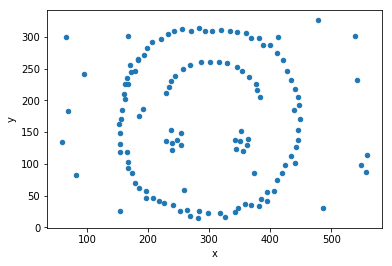

In [175]:
df.plot.scatter(x='x', y='y')

In [176]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=32, min_samples=4)
dbs.fit(df)
set(dbs.labels_)  # noisy is -1

{-1, 0, 1, 2, 3}

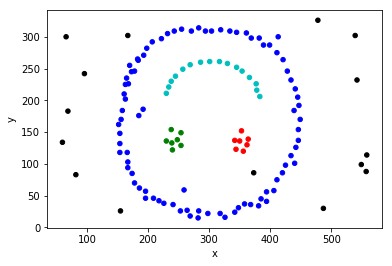

In [177]:
def f(x):  # for data with <= 6 cluster
    if x == -1: return 'k'
    a = ['b', 'g', 'r', 'c', 'm', 'y']
    return a[x]
color = np.array(list(map(f, dbs.labels_)))
df.plot.scatter(x='x', y='y', c=color)

In [178]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=3).fit(df)

In [179]:
dist, index = nn.kneighbors(df)
dist

array([[  0.        ,  14.14213562,  16.        ],
       [  0.        ,  14.        ,  16.        ],
       [  0.        ,  12.        ,  15.03329638],
       [  0.        ,   9.        ,  15.03329638],
       [  0.        ,   9.        ,  11.40175425],
       [  0.        ,  11.40175425,  15.5241747 ],
       [  0.        ,  11.18033989,  11.3137085 ],
       [  0.        ,   9.8488578 ,  13.        ],
       [  0.        ,   8.94427191,   9.8488578 ],
       [  0.        ,   8.94427191,  15.13274595],
       [  0.        ,  11.04536102,  15.62049935],
       [  0.        ,  11.04536102,  15.5241747 ],
       [  0.        ,  15.5241747 ,  17.4642492 ],
       [  0.        ,  10.        ,  20.        ],
       [  0.        ,   9.21954446,  17.88854382],
       [  0.        ,  10.04987562,  13.15294644],
       [  0.        ,   9.8488578 ,  11.70469991],
       [  0.        ,  12.16552506,  17.72004515],
       [  0.        ,  14.2126704 ,  17.72004515],
       [  0.        ,  13.     

In [180]:
d = [(dist[i][-1] + dist[i][-1]) / 2 for i in range(len(dist))]
d = sorted(d, reverse=True)
d

[101.01980003939822,
 100.68763578513501,
 85.70297544426332,
 80.05623023850174,
 70.06425622241343,
 70.00714249274856,
 65.29931086925804,
 64.88451279003334,
 55.54277630799526,
 47.50789408087881,
 40.311288741492746,
 38.01315561749642,
 33.12099032335839,
 32.38826948140329,
 28.160255680657446,
 26.019223662515376,
 26.019223662515376,
 25.079872407968907,
 20.8806130178211,
 20.615528128088304,
 20.0,
 19.313207915827967,
 19.313207915827967,
 18.867962264113206,
 18.681541692269406,
 18.681541692269406,
 17.88854381999832,
 17.88854381999832,
 17.72004514666935,
 17.72004514666935,
 17.4928556845359,
 17.46424919657298,
 17.46424919657298,
 17.46424919657298,
 17.204650534085253,
 17.204650534085253,
 17.204650534085253,
 17.029386365926403,
 17.0,
 17.0,
 16.97056274847714,
 16.97056274847714,
 16.76305461424021,
 16.278820596099706,
 16.278820596099706,
 16.278820596099706,
 16.278820596099706,
 16.15549442140351,
 16.15549442140351,
 16.0312195418814,
 16.0312195418814,
 1

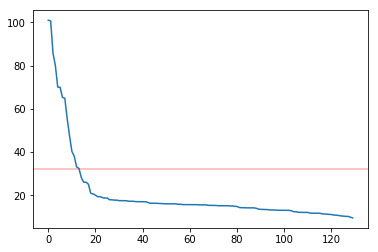

In [185]:
plt.plot(d)
plt.axhline(y=32, alpha=0.3, c='r')